In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
import math 
from collections import Counter
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split , StratifiedKFold,KFold
from sklearn.svm import SVC
from sklearn import datasets, svm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import ParameterGrid
import pandas as pd
import sympy as sym
import matplotlib.pyplot as plt
import numpy as np
from pylab import *
import statsmodels.api as sm
from scipy import misc
from sympy import *
from tabulate import tabulate
from numpy import array, diag, dot, maximum, empty, repeat, ones, sum
from numpy.linalg import inv
from sklearn.datasets import load_digits
import math 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.utils.class_weight import compute_class_weight
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn import datasets 
from time import time
from sklearn.metrics import roc_curve, auc,pairwise
from sklearn import datasets, svm
from sklearn.svm import SVC
from sklearn.datasets import make_circles, make_blobs, make_moons
from grakel import Graph
from grakel.kernels import NeighborhoodSubgraphPairwiseDistance
from mpl_toolkits.mplot3d import Axes3D
from itertools import cycle, islice
import strkernel 
from sklearn.datasets import make_moons, make_circles, make_classification
from strkernel.motifkernel import motifKernel
from Bio.Seq import Seq
import Bio.SeqIO as sio
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
from IPython.display import Image
import warnings
warnings.filterwarnings('ignore')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.datasets.lfw module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


## Let's load the iris data and make a binary data based on versicolor versus others

In [2]:
iris = datasets.load_iris()
X = iris.data
y = iris.target 
y[y == 2]=0    # Iris-Versicolor vs. others
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Let's make a parameter grid for our grid search

In [3]:
# C, gamma and degree space
nc, ng , nd = (2, 3 , 5)
c = np.linspace(0.1, 1000, nc)
gamma = np.linspace(0.0001, 1, ng)
degree = np.linspace(1, 6, nd)
param_grid = [
  {'C':c, 'kernel': ['rbf'],    'degree':[0], 'gamma': gamma,},    
  {'C':c, 'kernel': ['linear'], 'degree':degree, 'gamma': ['auto']},  
  {'C':c, 'kernel': ['poly'],   'degree':degree,  'gamma': gamma}, 
             ]
global grid
grid = ParameterGrid(param_grid)

## The code for two different K-fold (k=5) validation. The inner k-fold will perform cross validation through each outer fold. Finally, we will have the best parameters and their accuracy over each outer fold. Then, we can select the best parameters for our whole train and test sets.

In [4]:
skf = KFold(n_splits=5,random_state=10,shuffle=True )
sc = StandardScaler()
resultsDf=[]    
for train_index, test_index in skf.split(X_train, y_train):
    _X_train = X_train[train_index]
    _y_train = y_train[train_index]
    result={}
    for g in grid:
        skf = KFold(n_splits=5,random_state=10,shuffle=True )
        acc = []
        for train_index, valid_index in skf.split(_X_train, _y_train):
            _X_train_ = _X_train[train_index]
            _X_valid_ = _X_train[valid_index]
            _y_train_ = _y_train[train_index]
            _y_valid_ = _y_train[valid_index]
            
            if g['kernel'] ==['linear']:    
                poly = PolynomialFeatures(degree = g['degree'])
                _X_train_ = poly.fit_transform(_X_train_)
                _X_valid_ = poly.fit_transform(_X_valid_)
            _X_train_std_ = sc.fit_transform(_X_train_)
            _X_valid_std_ = sc.transform(_X_valid_)
            
            clf = SVC( C=g['C'], gamma = g['gamma'], degree = g['degree'], kernel= g['kernel'])
            clf.fit(_X_train_std_, _y_train_)
            acc.append(clf.score(_X_valid_std_, _y_valid_))
        
        result[tuple(g.values())] = acc
    result = pd.DataFrame.from_dict(result,columns=range(1,6), orient='index')
    result = result.mean(axis=1)
    model = result.idxmax()
    
    _X_test = X_train[test_index]
    _y_test = y_train[test_index]
    if model[3]=='linear':
        poly = PolynomialFeatures(degree = model[1])
        _X_train = poly.fit_transform(_X_train)
        _X_test = poly.fit_transform(_X_test)
    
    _X_train_std = sc.fit_transform(_X_train)
    _X_test_std = sc.transform(_X_test)
    
    clf = SVC( C=model[0], gamma = model[2], degree = model[1], kernel= model[3])
    clf.fit(_X_train_std, _y_train)
    acc = clf.score(_X_test_std, _y_test)
    resultsDf.append((model,acc,))
resultsDf = pd.DataFrame(data = resultsDf)
resultsDf.columns =['Parameters: C, Degree, gamma, Kernel', 'Accuracy']
resultsDf

,"Parameters: C, Degree, gamma, Kernel",Accuracy
0,"(0.1, 2.25, 1.0, poly)",0.958333
1,"(0.1, 4.75, 1.0, poly)",0.958333
2,"(1000.0, 2.25, 0.50005, poly)",0.916667
3,"(0.1, 4.75, 1.0, poly)",0.875000
4,"(0.1, 2.25, 1.0, poly)",0.958333


## Check the train and test set accuracy with best parameters (C=0.1, Degree=4.75, gamma=1,kernel=poly)

In [5]:
opt_kernel = 'poly'
opt_degree = 4.75
opt_C=0.1
opt_gamma = 1 
if opt_kernel=='linear':
    poly = PolynomialFeatures(degree = opt_degree)
    X_train = poly.fit_transform(X_train)
    X_test = poly.fit_transform(X_test)

X_train_std = sc.fit_transform(X_train)

opt_clf=SVC( C=opt_C,kernel = opt_kernel, gamma= opt_gamma,degree=opt_degree)
opt_clf.fit(X_train_std, y_train)
print('The train set accuracy with optimum parameters:',opt_clf.score(X_train_std, y_train))

X_test_std = sc.fit_transform(X_test)
print('The test set accuracy with optimum parameters:',opt_clf.score(X_test_std, y_test))

The train set accuracy with optimum parameters: 0.9666666666666667
The test set accuracy with optimum parameters: 1.0


## Question 2 (10 pts)
Write the explicit constraints (without using any vectorial notation, as a summation of single variables multiplied by a constant + bias term) of the Support Vector Machine to classify correctly iris dataset (Iris-Versicolor vs. others). In particular use 5 points in Iris-Versicolor, 2 points for iris-setosa, and 3 points for iris Virginia.
Please show the points you selected and after the constraints

In [6]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
y[y==2]=0
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

## I selected 2 points from setosa

In [7]:
X[0:2]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2]])

Its label is zero(0)

In [8]:
y[0:2]

array([0, 0])

## I selected 5 points from versicolor

In [9]:
X[55:60]

array([[5.7, 2.8, 4.5, 1.3],
       [6.3, 3.3, 4.7, 1.6],
       [4.9, 2.4, 3.3, 1. ],
       [6.6, 2.9, 4.6, 1.3],
       [5.2, 2.7, 3.9, 1.4]])

Its label is one (1)

In [10]:
y[56:61]

array([1, 1, 1, 1, 1])

## I selected 3 points from virginica

In [11]:
X[100:103]

array([[6.3, 3.3, 6. , 2.5],
       [5.8, 2.7, 5.1, 1.9],
       [7.1, 3. , 5.9, 2.1]])

Its label is zero (0)

In [12]:
y[100:103]

array([0, 0, 0])

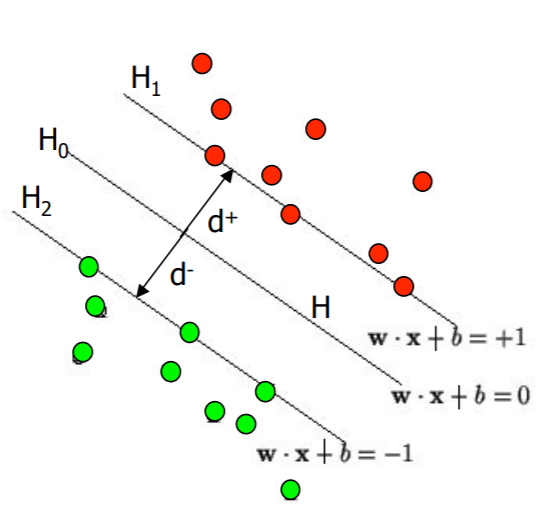

In [13]:
Image(filename='SVM-Definition.PNG')

For SVM, we can define the hyperplanes H such that:\
$w.x_i+b\geqslant+1$ when $y_i=+1$\
$w.x_i+b\leqslant-1$ when $y_i=-1$

$H_1$ and $H_2$ are the planes:\
$H_1: w.x_i+b = +1$\
$H_2: w.x_i+b = –1$

The points on the planes $H_1$ and $H_2$ are the tips of the Support Vectors. The plane $H_0$ is the median in between, where $w.x_i+b =0$.

$d+$ = the shortest distance to the closest positive point
$d-$ = the shortest distance to the closest negative point

The margin of a separating hyperplane is $d+ + d–$.

So we can write the constraints for our points:

The selected points from setosa and virginica from $H_2$ plane and the selected points from versicolor are from $H_1$ plane. Therefore, we can write the following equations as constraints.

## The constraints for selected points

## $w_1*5.1+w_2*3.5+w_3*1.4+w_4* 0.2+b \leqslant -1$
## $w_1*4.9+w_2*3+w_3*1.4+w_4* 0.2+b \leqslant -1$
## $w_1*6.3+w_2*3.3+w_3*6+w_4* 2.5+b \leqslant -1$
## $w_1*5.8+w_2*2.7+w_3*5.1+w_4* 1.9+b \leqslant -1$
## $w_1*7.1+w_2*3+w_3*5.9+w_4* 2.1+b \leqslant -1$


## $w_1*5.7+w_2*2.8+w_3*4.5+w_4* 1.3+b \geqslant +1$
## $w_1*6.3+w_2*3.3+w_3*4.7+w_4* 1.6+b \geqslant +1$
## $w_1*4.9+w_2*2.4+w_3*3.3+w_4* 1+b \geqslant +1$
## $w_1*6.6+w_2*2.9+w_3*4.6+w_4* 1.3+b \geqslant +1$
## $w_1*5.2+w_2*2.7+w_3*3.9+w_4* 1.4+b \geqslant +1$ 

We can plot these points:

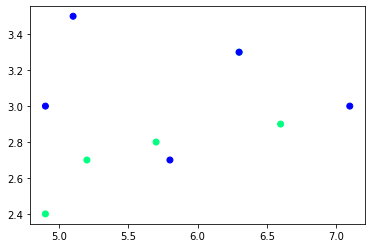

In [14]:
A=np.vstack((X[0:2],X[55:60],X[100:103]))
l=np.array([-1,-1,1,1,1,1,1,-1,-1,-1])
plt.scatter(A[:, 0], A[:, 1], c=l, cmap='winter')
plt.show()

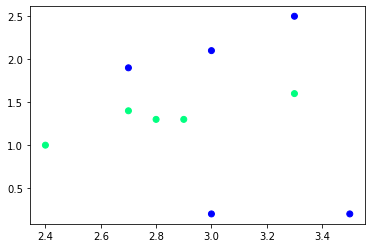

In [15]:
plt.scatter(A[:, 1], A[:, 3], c=l, cmap='winter')
plt.show()

As we can see, the separation of these points are not possible with linear separator.

# Extra Points ( 5pts)
An unbalanced dataset (e.g. 95% vs 5%) can be problematic even in the training phase. The learned function can be trivial, e.g. always predicting one class.
A possible solution can have a weight for each point in the way that making a mistake in the minority class will coun more w.r.t. the other. Please redefine the likelihood of the logistic regression to consider these weights for each point. Please compute the log-likelihood and its derivatives.
In addition, add to the negative log-likelihood the norm of W (sum of the square of each component) and compute the derivatives. 

The coefficients of the logistic regression algorithm are fit using an optimization algorithm that minimizes the negative log likelihood (loss) for the model on the training dataset.

\begin{equation}
minimize \sum_{i}^{n} - y^{(i)}  \log(a^{(i)}) - (1-y^{(i)} )  \log(1-a^{(i)})\tag{1}\\
\end{equation}

**Mathematical expression of the algorithm**:

For one example $x^{(i)}$:
$$z^{(i)} = w^T x^{(i)} + b \tag{2}$$
$$\hat{y}^{(i)} = a^{(i)} = sigmoid(z^{(i)})\tag{3}$$ 
$$ \mathcal{L}(a^{(i)}, y^{(i)}) =  - y^{(i)}  \log(a^{(i)}) - (1-y^{(i)} )  \log(1-a^{(i)})\tag{4}$$

The cost is then computed by summing over all training examples:
$$ J = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(a^{(i)}, y^{(i)})\tag{5}$$

**Key steps**:
In this exercise, you will carry out the following steps: 
    - Initialize the parameters of the model
    - Learn the parameters for the model by minimizing the cost  
    - Use the learned parameters to make predictions (on the test set)
    - Analyse the results and conclude

This involves the repeated use of the model to make predictions followed by an adaptation of the coefficients in a direction that reduces the loss of the model. The calculation of the loss for a given set of coefficients can be modified to take the class balance into account. By default, the errors for each class may be considered to have the same weighting, say 1.0. These weightings can be adjusted based on the importance of each class.

\begin{equation}
minimize \sum_{i}^{n} - W_0 y^{(i)}  \log(a^{(i)}) - W_1(1-y^{(i)} )  \log(1-a^{(i)})\tag{6}\\
\end{equation}

The weighting ($W_0$ and $W_1$) is applied to the loss so that smaller weight values result in a smaller error value, and in turn, less update to the model coefficients. A larger weight value results in a larger error calculation, and in turn, more update to the model coefficients.

Small Weight: Less importance, less update to the model coefficients.\
Large Weight: More importance, more update to the model coefficients.

As such, the modified version of logistic regression is referred to as Weighted Logistic Regression, Class-Weighted Logistic Regression or Cost-Sensitive Logistic Regression. The weightings are sometimes referred to as importance weightings. Although straightforward to implement, the challenge of weighted logistic regression is the choice of the weighting to use for each class.

### Forward and Backward propagation

We can do the "forward" and "backward" propagation steps for learning the parameters.

Forward Propagation:
- You get X
- You compute $A = \sigma(w^T X + b) = (a^{(1)}, a^{(2)}, ..., a^{(m-1)}, a^{(m)})$
- You calculate the cost function: $J = -\frac{1}{m}\sum_{i=1}^{m}y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)})$

Here are the two formulas you will be using: 

$$ \frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T\tag{7}$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})\tag{8}$$

Now, when we want to use weights for classes:

We can do the "forward" and "backward" propagation steps for learning the parameters.

Forward Propagation:
- We get X
- We compute $A = \sigma(w^T X + b) = (a^{(1)}, a^{(2)}, ..., a^{(m-1)}, a^{(m)})$
- We calculate the cost function: $J = -\frac{1}{m}\sum_{i=1}^{m} W_0 y^{(i)}\log(a^{(i)})+ W_1 (1-y^{(i)})\log(1-a^{(i)})$

Here are the four formulas you will be using: 

$$ \frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T\tag{9}$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})\tag{10}$$
$$ \frac{\partial J}{\partial W_0} = -\frac{1}{m}\sum_{i=1}^{m} y^{(i)}\log(a^{(i)})\tag{11}$$
$$ \frac{\partial J}{\partial W_1} = \frac{1}{m} \sum_{i=1}^m (1-y^{(i)})\log(1-a^{(i)})\tag{12}$$

Optimization
- We have initialized your parameters.
- we are also able to compute a cost function and its gradient.
- Now, you want to update the parameters using **gradient descent**.
The goal is to learn $w$, $W_0$, $W_1$ and $b$ by minimizing the cost function $J$. For a parameter $\theta$, the update rule is $ \theta = \theta - \alpha \text{ } d\theta$, where $\alpha$ is the learning rate.

### We can add L2 regularization term into the cost function:

\begin{equation}
J = -\frac{1}{m}[\sum_{i=1}^{m} W_0 y^{(i)}\log(a^{(i)})+ W_1 (1-y^{(i)})\log(1-a^{(i)})]+\lambda ||w||_2^2\\
\end{equation}


Here are the four formulas you will be using for gradient descent: 

$$ \frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T+2\lambda w\tag{13}$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})\tag{14}$$
$$ \frac{\partial J}{\partial W_0} = -\frac{1}{m}\sum_{i=1}^{m} y^{(i)}\log(a^{(i)})\tag{15}$$
$$ \frac{\partial J}{\partial W_1} = \frac{1}{m} \sum_{i=1}^m (1-y^{(i)})\log(1-a^{(i)})\tag{16}$$

## We can test the weighting method on the restrict unbalanced dataset (99% vs 1%):

In [16]:
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=2)

In [17]:
counter = Counter(y)
print(counter)

Counter({0: 9900, 1: 100})


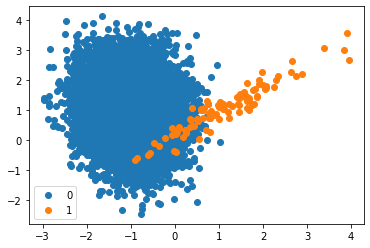

In [18]:
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
plt.legend()
plt.show()

In [19]:
# define model
model = LogisticRegression(solver='lbfgs')
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.985


This provides a baseline for comparison for any modifications performed to the standard logistic regression algorithm.

### Weighted Logistic Regression with Scikit-Learn

The scikit-learn Python machine learning library provides an implementation of logistic regression that supports class weighting.

The LogisticRegression class provides the class_weight argument that can be specified as a model hyperparameter. The class_weight is a dictionary that defines each class label (e.g. 0 and 1) and the weighting to apply in the calculation of the negative log likelihood when fitting the model.

For example, a 1 to 1 weighting for each class 0 and 1 can be defined. The class weighing can be defined multiple ways; for example:

Domain expertise, determined by talking to subject matter experts.
Tuning, determined by a hyperparameter search such as a grid search.
Heuristic, specified using a general best practice.
A best practice for using the class weighting is to use the inverse of the class distribution present in the training dataset.

For example, the class distribution of the test dataset is a 1:100 ratio for the minority class to the majority class. The inversion of this ratio could be used with 1 for the majority class and 100 for the minority class. 
We can evaluate the logistic regression algorithm with a class weighting using the same evaluation procedure defined in the previous section.

We would expect that the class-weighted version of logistic regression to perform better than the standard version of logistic regression without any class weighting.

In [20]:
# define model
weights = {0:0.01, 1:1.0}
model = LogisticRegression(solver='lbfgs', class_weight=weights)
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.989


Running the example prepares the synthetic imbalanced classification dataset, then evaluates the class-weighted version of logistic regression using repeated cross-validation.

The mean ROC AUC score is reported, in this case showing a better score than the unweighted version of logistic regression, 0.989 as compared to 0.985.

The scikit-learn library provides an implementation of the best practice heuristic for the class weighting.

It is implemented via the compute_class_weight() function and is calculated as:

n_samples / (n_classes * n_samples_with_class)
We can test this calculation manually on our dataset. For example, we have 10,000 examples in the dataset, 9900 in class 0, and 100 in class 1.

The weighting for class 0 is calculated as:

weighting = n_samples / (n_classes * n_samples_with_class)\
weighting = 10000 / (2 * 9900)\
weighting = 10000 / 19800\
weighting = 0.05

The weighting for class 1 is calculated as:

weighting = n_samples / (n_classes * n_samples_with_class)\
weighting = 10000 / (2 * 100)\
weighting = 10000 / 200\
weighting = 50

We can confirm these calculations by calling the compute_class_weight() function and specifying the class_weight as “balanced.” For example:

In [21]:
weighting = compute_class_weight('balanced', [0,1], y)
print(weighting)

[ 0.50505051 50.        ]


Running the example, we can see that we can achieve a weighting of about 0.5 for class 0 and a weighting of 50 for class 1.

These values match our manual calculation. The values also match our heuristic calculation above for inverting the ratio of the class distribution in the training dataset; for example:

0.5:50 == 1:100